<a href="https://colab.research.google.com/github/hxh00138/ai-science-training-series/blob/main/2022_0920_session1_clustering_Xiaohan_Hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(400, 2) (400,) (4, 2)


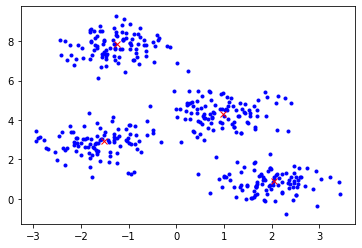

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

In [7]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [8]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

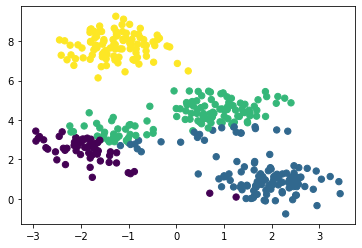

In [30]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

centroids unchanged as of step 4


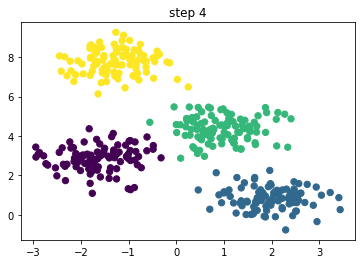

In [32]:
from ast import Break
delta = 0.01
#last_centroids = initialize_centroids(x,N)
#last_labels = assign_labels(x,last_centroids)
last_centroids = c
last_labels = l

step = 0
plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

loop_N = 100
for i in range(loop_N):
  step = step + 1

  centroids = get_new_centroids(x,last_labels,N)
  labels = assign_labels(x,centroids)

  # test if centroids have stopped moving
  if np.all((last_centroids - centroids) < delta):
    print('centroids unchanged as of step %d' % step)
    break
    # done
  elif np.all(labels == last_labels):
    print('point labels unchanged as of step %d' % step)
    break
    # done
  else:
   last_labels = labels
   last_centroids = centroids

  plt.close('all')

  plt.subplot(1, 2, 1)
  plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
  plt.title('step %d' % step)

  plt.subplot(1, 2, 2)
  plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, s=40, cmap='viridis')
  plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')
  plt.title('Truth')
  plt.show()
  time.sleep(1)
  ipydis.clear_output(wait=True)


# we can use the "truth" labels, cluster_labels to see how well we are doing
# accuracy: # of points correctly labeled / total number of points 
# accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
# print('accuracy: ',accuracy)
plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % step)
plt.show()